# Homework Session 3
by Benedikt Luther, Gordon Flaegel, Natnael Guesh Hagos, Nele Dauelsberg

## Task 1: Import data and merge them

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


kiwo = pd.read_csv('https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv')
umsatz = pd.read_csv('https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv')
wetter = pd.read_csv('https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv')

kiwo_umsatz_wetter = kiwo.merge(umsatz, on='Datum').merge(wetter, on='Datum')
kiwo_umsatz_wetter['Datum'] = pd.to_datetime(kiwo_umsatz_wetter['Datum'])
print(kiwo_umsatz_wetter.head())

       Datum  KielerWoche       id  Warengruppe      Umsatz  Bewoelkung  \
0 2014-06-21            1  1406211            1  162.410673         6.0   
1 2014-06-21            1  1406212            2  691.302130         6.0   
2 2014-06-21            1  1406213            3  266.758834         6.0   
3 2014-06-21            1  1406214            4   55.378436         6.0   
4 2014-06-21            1  1406215            5  398.075089         6.0   

   Temperatur  Windgeschwindigkeit  Wettercode  
0     15.5125                   18        61.0  
1     15.5125                   18        61.0  
2     15.5125                   18        61.0  
3     15.5125                   18        61.0  
4     15.5125                   18        61.0  


## Taks 2: Create descriptive statistics and visualizations

### The daily sales and average sales during KiWo

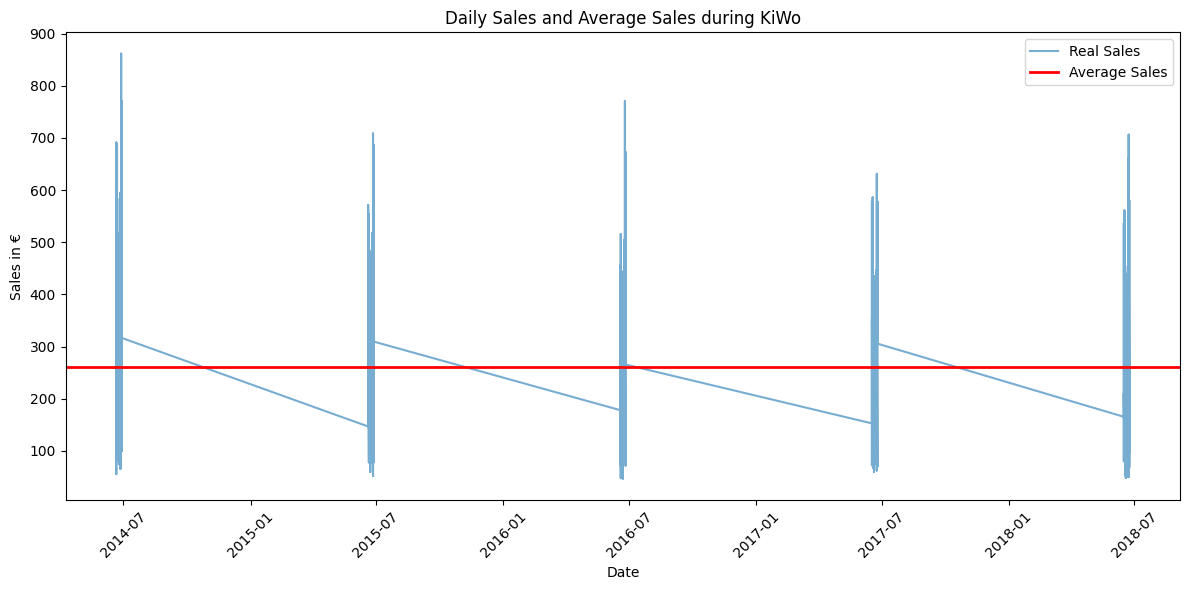

In [53]:

avg_umsatz = kiwo_umsatz_wetter['Umsatz'].mean()


plt.figure(figsize=(12, 6))
plt.plot(kiwo_umsatz_wetter['Datum'], kiwo_umsatz_wetter['Umsatz'], label='Real Sales', alpha=0.6)
plt.axhline(avg_umsatz, color='red', linewidth=2, label='Average Sales')
plt.title('Daily Sales and Average Sales during KiWo')
plt.xlabel('Date')
plt.ylabel('Sales in €')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### The total Sales per year during KiWo

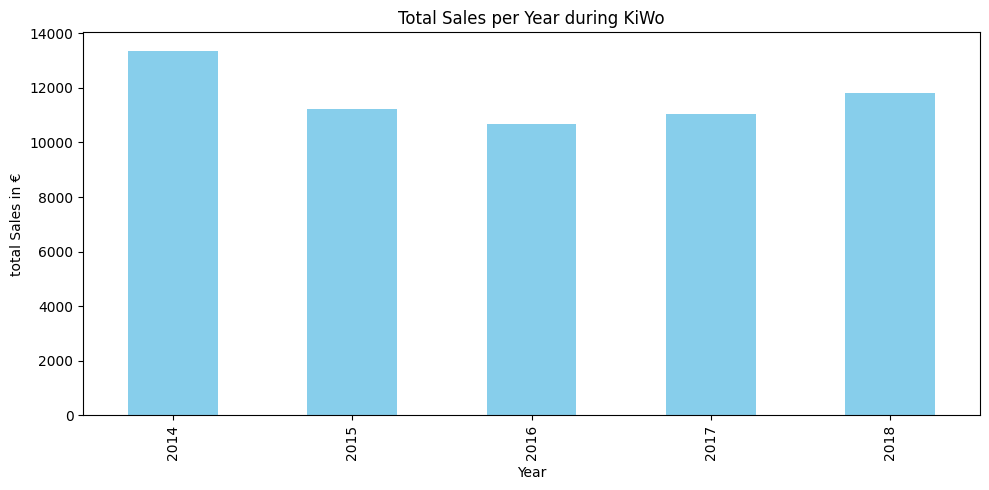

In [54]:

kiwo_umsatz_wetter['Jahr'] = kiwo_umsatz_wetter['Datum'].dt.year


umsatz_pro_jahr = kiwo_umsatz_wetter.groupby('Jahr')['Umsatz'].sum()


plt.figure(figsize=(10, 5))
umsatz_pro_jahr.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Year during KiWo') 
plt.xlabel('Year')
plt.ylabel('total Sales in €')
plt.tight_layout()
plt.show()

### The Average Temperature and Sales during KiWo 2018

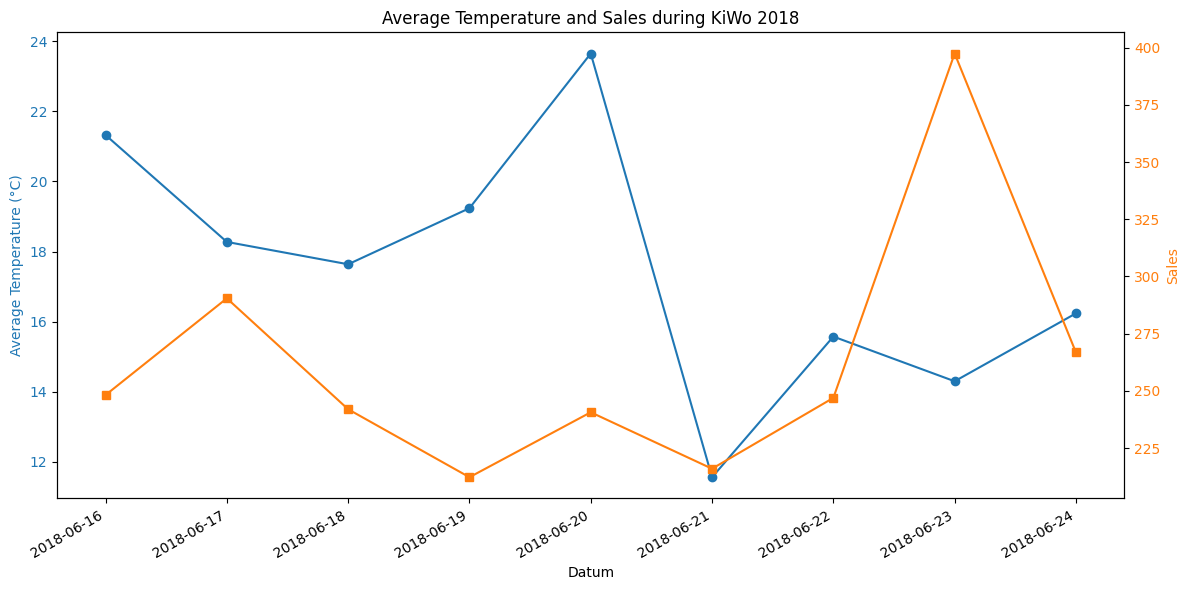

In [55]:

df_2018 = kiwo_umsatz_wetter[kiwo_umsatz_wetter['Jahr'] == 2018]
df_2018_avg = df_2018.groupby('Datum')['Temperatur'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_2018_avg['Datum'], df_2018_avg['Temperatur'], color='tab:blue', marker='o', label='Durchschnittstemperatur')
ax1.set_xlabel('Datum')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


umsatz_2018 = df_2018.groupby('Datum')['Umsatz'].mean().reset_index()
ax2 = ax1.twinx()
ax2.plot(umsatz_2018['Datum'], umsatz_2018['Umsatz'], color='tab:orange', marker='s', label='Umsatz')
ax2.set_ylabel('Sales', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Average Temperature and Sales during KiWo 2018')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

### Cloudiness and Wind Speed during KiWo 2015

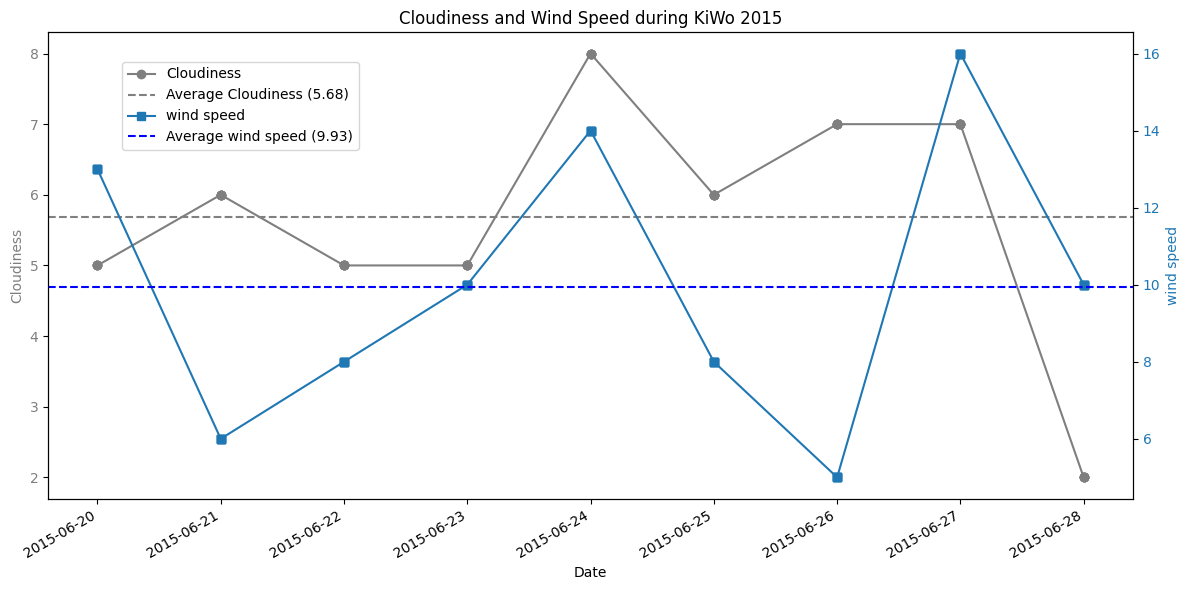

In [56]:

df_2015 = kiwo_umsatz_wetter[kiwo_umsatz_wetter['Jahr'] == 2015]

avg_bewoelkung = df_2015['Bewoelkung'].mean()
avg_wind = df_2015['Windgeschwindigkeit'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.plot(df_2015['Datum'], df_2015['Bewoelkung'], color='tab:gray', marker='o', label='Cloudiness')
ax1.axhline(avg_bewoelkung, color='gray', linestyle='--', label=f'Average Cloudiness ({avg_bewoelkung:.2f})')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cloudiness', color='tab:gray')
ax1.tick_params(axis='y', labelcolor='tab:gray')


ax2 = ax1.twinx()
ax2.plot(df_2015['Datum'], df_2015['Windgeschwindigkeit'], color='tab:blue', marker='s', label='wind speed')
ax2.axhline(avg_wind, color='blue', linestyle='--', label=f'Average wind speed ({avg_wind:.2f})')
ax2.set_ylabel('wind speed', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Cloudiness and Wind Speed during KiWo 2015')
fig.autofmt_xdate()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.tight_layout()
plt.show()